In [3]:
import pandas as pd
import numpy as np
import shinobi_behav
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
from nilearn.plotting import plot_stat_map, show
import argparse
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import os.path as op
import os

sub = "sub-01"

path_to_data = shinobi_behav.DATA_PATH
models = ["simple"]
model = "simple"
CONDS_LIST = ['HIT', 'JUMP', 'DOWN', 'LEFT', 'RIGHT', 'Kill', 'HealthLoss']#, 'Kill', 'HealthLoss']#'HealthGain', 'UP']
#additional_contrasts = ['HIT+JUMP-RIGHT-LEFT-UP-DOWN', 'RIGHT+LEFT+UP+DOWN-HIT-JUMP']
contrasts = CONDS_LIST# + additional_contrasts

mvpa_results_path = op.join(path_to_data, "processed", "mvpa_results")
os.makedirs(mvpa_results_path, exist_ok=True)
confusion_matrices_fname = f"{sub}_{model}_confusion_matrices.pkl"
if op.isfile(op.join(mvpa_results_path, confusion_matrices_fname)):
    with open(op.join(mvpa_results_path, confusion_matrices_fname), 'rb') as f:
        confusion_matrices = pickle.load(f)


In [4]:
confusion_matrices

[array([[0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1]]),
 array([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1]]),
 array([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1]]),
 array([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1]]),
 array([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],


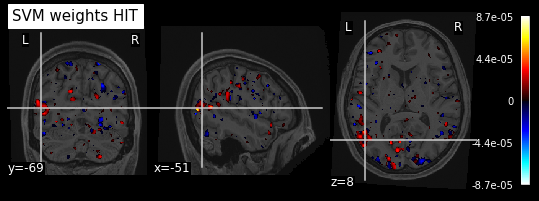

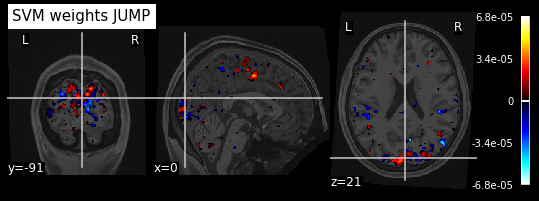

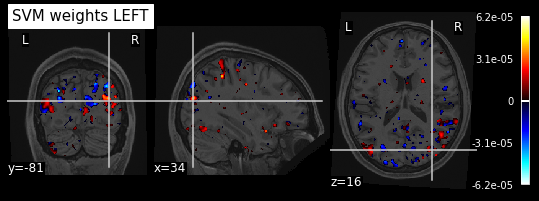

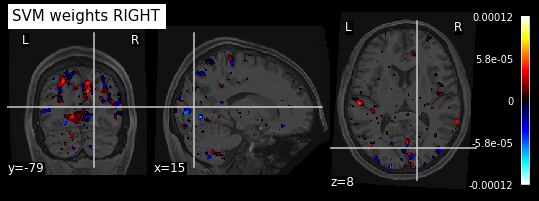

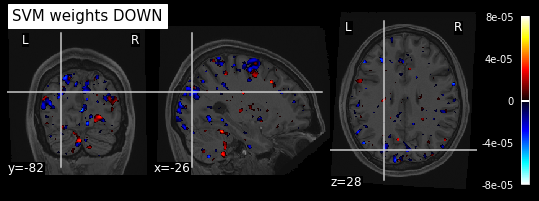

In [9]:
import matplotlib.pyplot as plt


for cond in ["HIT", "JUMP", "LEFT", "RIGHT", "DOWN"]:
    weight_img = decoder.coef_img_[cond]

    plot_stat_map(weight_img, bg_img=anat_fname, title=f"SVM weights {cond}")
    show()

In [1]:
import os
import os.path as op
import pandas as pd
import numpy as np
import shinobi_behav
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
from nilearn.plotting import plot_stat_map, show
import argparse
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import os.path as op
import os

parser = argparse.ArgumentParser()
parser.add_argument(
    "-s",
    "--subject",
    default=None,
    type=str,
    help="Subject to process",
)
args = parser.parse_args()

def main():
    path_to_data = shinobi_behav.DATA_PATH
    models = ["simple"]
    model = "simple"
    CONDS_LIST = ['HIT', 'JUMP', 'DOWN', 'LEFT', 'RIGHT', 'Kill', 'HealthLoss']#, 'Kill', 'HealthLoss']#'HealthGain', 'UP']
    #additional_contrasts = ['HIT+JUMP-RIGHT-LEFT-UP-DOWN', 'RIGHT+LEFT+UP+DOWN-HIT-JUMP']
    contrasts = CONDS_LIST# + additional_contrasts
    if args.subject is not None:
        subjects = [args.subject]
    else:
        subjects = shinobi_behav.SUBJECTS
    for sub in subjects:
        mvpa_results_path = op.join(path_to_data, "processed", "mvpa_results")
        os.makedirs(mvpa_results_path, exist_ok=True)
        confusion_matrices_fname = f"{sub}_{model}_confusion_matrices.pkl"
        if op.isfile(op.join(mvpa_results_path, confusion_matrices_fname)):
            with open(op.join(mvpa_results_path, confusion_matrices_fname), 'rb') as f:
                confusion_matrices = pickle.load(f)
        else:

            mask_fname = op.join(
                path_to_data,
                "cneuromod.processed",
                "smriprep",
                sub,
                "anat",
                f"{sub}_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz",
            )
            anat_fname = op.join(
                path_to_data,
                "cneuromod.processed",
                "smriprep",
                sub,
                "anat",
                f"{sub}_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz",
            )
            #for model in models:
            z_maps = []
            contrast_label = []
            session_label = []
            for contrast in contrasts:
                z_maps_fpath = op.join(path_to_data, "processed", "z_maps", "ses-level", contrast)
                for z_map_fname in os.listdir(z_maps_fpath):
                    if model in z_map_fname:
                        if sub in z_map_fname:
                            session = z_map_fname.split("_")[1]
                            z_maps.append(op.join(z_maps_fpath, z_map_fname))
                            contrast_label.append(contrast)
                            session_label.append(session)

            decoder = Decoder(estimator='svc', mask=mask_fname, standardize=False,
                            screening_percentile=5, cv=LeaveOneGroupOut(), n_jobs=-1, verbose=1)
            decoder.fit(z_maps, contrast_label, groups=session_label)

            classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
            chance_level = 1. / len(np.unique(contrast_label))
            print(f'Decoding : {sub} {model}')
            print('Classification accuracy: {:.4f} / Chance level: {}'.format(
                classification_accuracy, chance_level))
            
            for cond in contrasts:
                output_fname = op.join("./", "reports", "figures", "subject-level", cond, "MVPA", f"{sub}_{cond}_{model}_mvpa.png")
                os.makedirs(op.join("./", "reports", "figures", "subject-level", cond, "MVPA"), exist_ok=True)
                weight_img = decoder.coef_img_[cond]
                plot_stat_map(weight_img, bg_img=anat_fname, title=f"SVM weights {cond}", output_file=output_fname)

            # Generate confusion matrices across folds
            confusion_matrices = []
            for train, test in decoder.cv.split(z_maps, contrast_label, groups=session_label):
                decoder.fit(np.array(z_maps)[train], np.array(contrast_label)[train], groups=np.array(session_label)[train])
                y_pred = decoder.predict(np.array(z_maps)[test])
                y_true = np.array(contrast_label)[test]
                confusion_mat = confusion_matrix(y_true, y_pred, labels=decoder.classes_)
                confusion_matrices.append(confusion_mat)
        
            # Save confusion matrices
            with open(op.join(mvpa_results_path, confusion_matrices_fname), 'wb') as f:
                pickle.dump(confusion_matrices, f)

            # Plot confusion matrices
            averaged_confusion_matrix = np.mean(confusion_matrices, axis=0)
            std_confusion_matrix = np.std(confusion_matrices, axis=0)
            sbn.heatmap(averaged_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=decoder.classes_, yticklabels=decoder.classes_)
            output_fname = op.join("./", "reports", "figures", "subject-level", "confusion_matrices", f"{sub}_{model}_averaged_confusion_matrix.png")
            os.makedirs(op.join("./", "reports", "figures", "subject-level", "confusion_matrices"), exist_ok=True)
            plt.savefig(output_fname)
            plt.close()
            sbn.heatmap(std_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=decoder.classes_, yticklabels=decoder.classes_)
            output_fname = op.join("./", "reports", "figures", "subject-level", "confusion_matrices", f"{sub}_{model}_std_confusion_matrix.png")
            plt.savefig(output_fname)
            plt.close()


if __name__ == "__main__":
    main()

/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
usage: ipykernel_launcher.py [-h] [-s SUBJECT]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/hyruuk/.local/share/jupyter/runtime/kernel-1dfed9ed-b18c-4005-8443-0351215a36ed.json


SystemExit: 2

/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
